## Example reading data from h5 files
[Norstore data site](http://ecco.norstore.uio.no/)
example with Lakes_clt_EUR-11_MOHC-HadGEM2-ES_historical_r1i1p1_SMHI

In [24]:
import h5py as h5
import pandas as pd
import datetime as dt

First, you must load the metadata file. The metadat file is avialbe from the ECCO repo on github. This is easily done with pandas, like so:

In [9]:
meta = pd.read_csv('Metadata/Lake_Stats.csv') 

meta.head()

,Lake_ID,Lon,Lat,Alt,Dist,Area,Dist3D,Country
0,a2204,13.445644,59.327617,45.449316,-127.0,0.05,127.000008,Sweden
1,ccc59c,19.653206,63.445091,3.480706,-1.0,0.16,1.000006,Sweden
2,155980,18.316388,63.212028,125.780994,-12.0,0.56,12.000659,Sweden
3,dade22,13.872801,63.295033,297.376465,-133.0,0.52,133.000332,Sweden
4,1fc67b,17.288603,63.300165,210.000316,-39.0,0.34,39.000565,Sweden


The metadata contains metadata about the lakes. These are classified by ID. You can use the ID as an index to access the lake in each h5 file.

To load data for a specific lake, you must connect to a h5 file, and then extract the data as shown below:

In [25]:
fname='/Users/Ben/Downloads/Lakes_clt_EUR-11_MOHC-HadGEM2-ES_historical_r1i1p1_SMHI-RCA4_v1_day_19710101-19751230.h5'

with h5.File(fname, mode='r') as f:
    lake_data = f[meta.Lake_ID[1]].value

The `lake_data` variable is now a numpy array of values, a 1D time-series

In [26]:
print('Lenght of data: ',len(lake_data))
lake_data

Lenght of data:  1800


array([ 66.28125,  47.9375 ,  91.03125, ...,  84.40625,  86.09375,
        81.03125], dtype=float32)

Let's map the values to dates based on the dates extracted from the filename

In [35]:
date_list = fname.split('/')[-1].split('.h5')[0].split('_')[-1].split("-")
dts = [dt.datetime(int(date[0:4]), int(date[4:6]), int(date[6:8])) for date in date_list]

In [89]:
date_list = pd.date_range(dts[0], dts[1])

In [96]:
df = pd.DataFrame(lake_data,index=date_list[0:-25], columns=['cloud_cover'])
df.head()

,cloud_cover
1971-01-01,66.28125
1971-01-02,47.93750
1971-01-03,91.03125
1971-01-04,38.18750
1971-01-05,50.81250


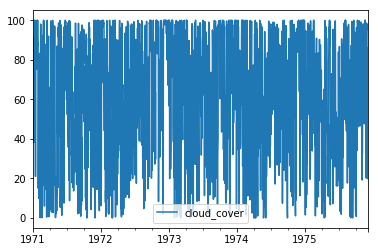

In [109]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113c38630>]], dtype=object)

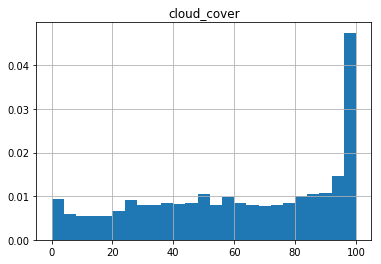

In [102]:
df.hist(normed=True, bins=25)